# INF8225 TP1 H25 (v2.0)

**Mathis** - NGUYEN/ Matricule 2409535

Partie 3 réalisée: [seul(e)]
ou avec
[Mohamed-Ali - LAJNEF -
Matricule 2404991]

Date limite :

20h30 le 6 février 2025 (Partie 1 et 2)

20h30 le 20 février 2025 (Partie 3)

Remettez votre fichier Colab sur Moodle en 2 formats: **.pdf** ET **.ipynb**

**Comment utiliser**:

Il faut copier ce notebook dans vos dossiers pour avoir une version que vous pouvez modifier, voici deux façons de le faire:
* File / Save a copy in Drive ...
* File / Download .ipynb

**Pour utiliser un GPU**

Runtime / Change Runtime Type / Hardware Accelerator / GPU

# Partie 1 (16 points)



## Objectif
L’objectif de la Partie 1 du travail pratique est de permettre à l’étudiant de se familiariser avec les réseaux Bayésiens et la librairie Numpy.

## Problème


Considérons le réseau Bayésien ci-dessous.

<img src="https://drive.google.com/uc?id=1QCJSfYGLJVg2-0_BO8BEHCnMEDsHSR6k" alt="bayes_net" width="600"/>

Ceci représente un modèle simple pour les notes à un examen (G) et sa relation avec les étudiants qui se préparent aux examens et font correctement le travail pour les devoirs (S), les étudiants qui ont des difficultés dans la vie juste avant l'examen final (D), les étudiants qui réussissent bien à un entretien technique pour un emploi axé sur le sujet du cours (R), et des étudiants qui se retrouvent sur une sorte de palmarès de leur programme (L).

## Trucs et astuces
Nous utiliserons des vecteurs multidimensionnels `5d-arrays` dont les `axes` représentent:
```
axe 0 : Se préparer (S)
axe 1 : Difficultés avant l'exam (D)
axe 2 : Réussir l'entretien technique (R)
axe 3 : Note dans le cours (Grade) (G)
axe 4 : Liste d'honneur (L)
```

Chaque `axe` serait de dimension `2` ou `3`:
```
Exemple pour S:
0 : s0
1 : s1

Exemple pour G:
0 : g0
1 : g1
2 : g2
```
Quelques point à garder en tête:
- Utiliser la jointe comme point de départ pour vos calculs (ne pas développer tous les termes à la main).
- Attention à l'effet du do-operator sur le graphe.
- L'argument "keepdims=True" de "np.sum()" vous permet conserver les mêmes indices.
- Pour un rappel sur les probabilités conditionelles, voir: https://www.probabilitycourse.com/chapter1/1_4_0_conditional_probability.php

## 1. Complétez les tables de probabilités ci-dessous

In [ ]:
import numpy as np
np.set_printoptions(precision=5)

# Les tableaux sont bâtis avec les dimensions (S, D, R, G, L)
# et chaque dimension avec les probablités associées aux 2 ou 3 valeurs possibles ({0, 1} ou {0, 1, 2})

Pr_S = np.array([0.2, 0.8]).reshape(2, 1, 1, 1, 1) # Donné en exemple
Pr_D = np.array([0.9, 0.1]).reshape(1, 2, 1, 1, 1)

Pr_R_given_S = np.array([
    [0.9, 0.1],
    [0.2, 0.8]
]).reshape(2, 1, 2, 1, 1)


Pr_G_given_SD = np.array([
    [[0.5, 0.3, 0.2], [0.9, 0.08, 0.02]],
    [[0.1, 0.2, 0.7], [0.3, 0.4, 0.3]]
]).reshape(2, 2, 1, 3, 1)

Pr_L_given_G = np.array([
    [0.9, 0.1],
    [0.6, 0.4],
    [0.01, 0.99]
]).reshape(1, 1, 1, 3, 2)

print (f"Pr(S)=\n{np.squeeze(Pr_S)}\n")
print (f"Pr(D)=\n{np.squeeze(Pr_D)}\n")
print (f"Pr(R|S)=\n{np.squeeze(Pr_R_given_S)}\n")
print (f"Pr(G|S,D)=\n{np.squeeze(Pr_G_given_SD)}\n")
print (f"Pr(L|G)=\n{np.squeeze(Pr_L_given_G)}\n")

Pr(S)=
[0.2 0.8]

Pr(D)=
[0.9 0.1]

Pr(R|S)=
[[0.9 0.1]
 [0.2 0.8]]

Pr(G|S,D)=
[[[0.5  0.3  0.2 ]
  [0.9  0.08 0.02]]

 [[0.1  0.2  0.7 ]
  [0.3  0.4  0.3 ]]]

Pr(L|G)=
[[0.9  0.1 ]
 [0.6  0.4 ]
 [0.01 0.99]]



## 2. À l'aide de ces tables de probabilité conditionnelles, calculez les requêtes ci-dessous. Dans les cas où l'on compare un calcul non interventionnel à un calcul interventionnel, commentez sur l'interprétation physique des deux situations et les résultats obtenus à partir de vos modèles.

a) $Pr(G) = [P (G = g^0), P (G = g^1), P (G = g^2)]$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G
answer_a = np.sum(P_joint, axis=(0, 1, 2, 4)).squeeze()
print(f"Pr(G)={answer_a}")

Pr(G)=[0.204  0.2316 0.5644]


b) $Pr(G|R = r^1)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(G, R = r^1)
P_GR1 = np.sum(P_joint[:, :, 1:2, :, :], axis=(0, 1, 4))

# P(R = r^1)
P_R1 = np.sum(P_joint[:, :, 1:2, :, :], axis=(0, 1, 3, 4))

# P(G | R = r^1) = P(G, R = r^1) / P(R = r^1)
answer_b = (P_GR1 / P_R1).squeeze()
print(f"Pr(G|R=r1)={answer_b}")

Pr(G|R=r1)=[0.13273 0.22176 0.64552]


c)  $Pr(G|R = r^0)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(G, R = r^0)
P_GR0 = np.sum(P_joint[:, :, 0:1, :, :], axis=(0, 1, 4))

# P(R = r^0)
P_R0 = np.sum(P_joint[:, :, 0:1, :, :], axis=(0, 1, 3, 4))

# P(G | R = r^0) = P(G, R = r^0) / P(R = r^0)
answer_c = (P_GR0 / P_R0).squeeze()
print(f"Pr(G|R=r0)={answer_c}")

Pr(G|R=r0)=[0.34235 0.25071 0.40694]


d) $Pr(G|R=r^1, S=s^0)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(G, R = r^1, S = s^0)
P_GR1S0 = np.sum(P_joint[0:1, :, 1:2, :, :], axis=(1, 4))

# P(R = r^1, S = s^0)
P_R1S0 = np.sum(P_joint[0:1, :, 1:2, :, :], axis=(1, 3, 4))

# P(G | R = r^1, S = s^0) = P(G, R = r^1, S = s^0) / P(R = r^1, S = s^0)
answer_d = (P_GR1S0 / P_R1S0).squeeze()
print(f"Pr(G|R=r1, S=s0)={answer_d}")

Pr(G|R=r1, S=s0)=[0.54  0.278 0.182]


e) $Pr(G|R=r^0, S=s^0)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(G, R = r^0, S = s^0)
P_GR0S0 = np.sum(P_joint[0:1, :, 0:1, :, :], axis=(1, 4))

# P(R = r^0, S = s^0)
P_R0S0 = np.sum(P_joint[0:1, :, 0:1, :, :], axis=(1, 3, 4))

# P(G | R = r^0, S = s^0) = P(G, R = r^0, S = s^0) / P(R = r^0, S = s^0)
answer_e = (P_GR0S0 / P_R0S0).squeeze()
print(f"Pr(G|R=r0, S=s0)={answer_e}")

Pr(G|R=r0, S=s0)=[0.54  0.278 0.182]


f) $Pr(R|D=d^1)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(R, D = d^1)
P_RD1 = np.sum(P_joint[:, 1:2, :, :, :], axis=(0, 3, 4))

# P(D = d^1)
P_D1 = np.sum(P_joint[:, 1:2, :, :, :], axis=(0, 2, 3, 4))

# P(R | D = d^1) = P(R, D = d^1) / P(D = d^1)
answer_f = (P_RD1 / P_D1).squeeze()
print(f"Pr(R|D=d1)={answer_f}")

Pr(R|D=d1)=[0.34 0.66]


g) $Pr(R|D=d^0)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(R, D = d^0)
P_RD0 = np.sum(P_joint[:, 0:1, :, :, :], axis=(0, 3, 4))

# P(D = d^0)
P_D0 = np.sum(P_joint[:, 0:1, :, :, :], axis=(0, 2, 3, 4))

# P(R | D = d^0) = P(R, D = d^0) / P(D = d^0)
answer_g= (P_RD0 / P_D0).squeeze()
print(f"Pr(R|D=d0)={answer_g}")

Pr(R|D=d0)=[0.34 0.66]


h) $Pr(R|D=d^1, G=g^2)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(R, D = d^1, G = g^2)
P_RD1G2 = np.sum(P_joint[:, 1:2, :, 2:3, :], axis=(0, 4))

# P(D = d^1, G = g^2)
P_D1G2 = np.sum(P_joint[:, 1:2, :, 2:3, :], axis=(0, 2, 4))

# P(R | D = d^1, G = g^2)
answer_h = (P_RD1G2 / P_D1G2).squeeze()
print(f"Pr(R|D=d1, G=g2)={answer_h}")

Pr(R|D=d1, G=g2)=[0.21148 0.78852]


i) $Pr(R|D=d^0, G=g^2)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(R, D = d^0, G = g^2)
P_RD0G2 = np.sum(P_joint[:, 0:1, :, 2:3, :], axis=(0, 4))

# P(D = d^0, G = g^2)
P_D0G2 = np.sum(P_joint[:, 0:1, :, 2:3, :], axis=(0, 2, 4))

# P(R | D = d^0, G = g^2)
answer_i = (P_RD0G2 / P_D0G2).squeeze()
print(f"Pr(R|D=d0, G=g2)={answer_i}")

Pr(R|D=d0, G=g2)=[0.24667 0.75333]


j) $Pr(R|D=d^1, L=l^1)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(R, D = d^1, L = l^1)
P_RD1L1 = np.sum(P_joint[:, 1:2, :, :, 1:2], axis=(0, 3))

# P(D = d^1, L = l^1)
P_D1L1 = np.sum(P_joint[:, 1:2, :, :, 1:2], axis=(0, 2, 3))

# P(R | D = d^1, L = l^1)
answer_j = (P_RD1L1 / P_D1L1).squeeze()
print(f"Pr(R|D=d1, L=l1)={answer_j}")

Pr(R|D=d1, L=l1)=[0.2475 0.7525]


k) $Pr(R|D=d^0, L=l^1)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(R, D = d^0, L = l^1)
P_RD0L1 = np.sum(P_joint[:, 0:1, :, :, 1:2], axis=(0, 3))

# P(D = d^0, L = l^1)
P_D0L1 = np.sum(P_joint[:, 0:1, :, :, 1:2], axis=(0, 2, 3))

# P(R | D = d^0, L = l^1)
answer_k = (P_RD0L1 / P_D0L1).squeeze()
print(f"Pr(R|D=d0, L=l1)={answer_k}")

Pr(R|D=d0, L=l1)=[0.2736 0.7264]


l) $Pr(R|do(G=g^2))$

In [ ]:
P_joint2 = Pr_S * Pr_D * Pr_R_given_S * Pr_L_given_G

answer_l = np.sum(P_joint2[:, :, :, 2:3, :], axis=(0, 1, 4)).squeeze()
print(f"Pr(R|do(G=g2))={answer_l}")

Pr(R|do(G=g2))=[0.34 0.66]


m) $Pr(R|G=g^2)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G
# P(R, G = g^2)
P_RG2 = np.sum(P_joint[:, :, :, 2:3, :], axis=(0, 1, 4))

# P(G = g^2)
P_G2 = np.sum(P_joint[:, :, :, 2:3, :], axis=(0, 1, 2, 4))

# P(R | G = g^2)
answer_m = (P_RG2 / P_G2).squeeze()

print(f"Pr(R|G=g2)={answer_m}")

Pr(R|G=g2)=[0.24515 0.75485]


n) $Pr(R)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G
answer_n = np.sum(P_joint, axis=(0, 1, 3, 4)).squeeze()
print(f"Pr(R={answer_n}")

Pr(R=[0.34 0.66]


o) $Pr(G|do(L=l^1))$

In [ ]:
P_joint_3 = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD
answer_o = np.sum(P_joint_3[:, :, :, :, :], axis=(0, 1, 2)).squeeze()
print(f"Pr(G|do(L=l1))={answer_o}")

Pr(G|do(L=l1))=[0.204  0.2316 0.5644]


p) $Pr(G=1|L=l^1)$

In [ ]:
P_joint = Pr_S * Pr_D * Pr_R_given_S * Pr_G_given_SD * Pr_L_given_G

# P(G = g^1, L = l^1)
P_G1L1 = np.sum(P_joint[:, :, :, 1:2, 1:2], axis=(0, 1, 2))

# P(L = l^1)
P_L1 = np.sum(P_joint[:, :, :, :, 1:2], axis=(0, 1, 2, 3))

# P(G = g^1 | L = l^1)
answer_p = (P_G1L1 / P_L1).squeeze()

print(f"Pr(G=g1|L=l1)={answer_p}")

Pr(G=g1|L=l1)=0.13789900505510602


**Réponse:**

# Partie 2 (20 points)

## Objectif

L’objectif de la partie 2 du travail pratique est de permettre à l’étudiant de se familiariser avec l’apprentissage automatique via la régression logistique. Nous allons donc résoudre un problème de classification d'images en utilisant l’approche de descente du gradient (gradient descent) pour optimiser la log-vraisemblance négative (negative log-likelihood) comme fonction de perte.

L'algorithme à implémenter est une variation de descente de gradient qui s’appelle l’algorithme de descente de gradient stochastique par mini-ensemble (mini-batch stochastic gradient descent).  Votre objectif est d’écrire un programme en Python pour optimiser les paramètres d’un modèle étant donné un ensemble de données d’apprentissage, en utilisant un ensemble de validation pour déterminer quand arrêter l'optimisation, et finalement de montrer la performance sur l’ensemble du test.

## Théorie: la régression logistique et le calcul du gradient


Il est possible d’encoder l’information concernant l’étiquetage avec des vecteurs multinomiaux (one-hot vectors), c.-à-d. un vecteur de zéros avec un seul 1 pour indiquer quand la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. Les caractéristiques (features) sont données par des vecteurs $\mathbf{x}_i \in \mathbb{R}^{D}$. En définissant les paramètres de notre modèle comme : $\mathbf{W}=[\mathbf{w}_1, \cdots, \mathbf{w}_K]^T$ et $\mathbf{b}=[b_1, b_2, \cdots  b_K]^T$ et la fonction softmax comme fonction de sortie, on peut exprimer notre modèle sous la forme :
\begin{eqnarray}
    p(\mathbf{y}|\mathbf{x})
    &=& \frac{\exp(\mathbf{y}^T \mathbf{W} \mathbf{x} + \mathbf{y}^T \mathbf{b})}{\sum_{\mathbf{y}_k \in \mathscr{Y}} \exp(\mathbf{y}_k^T \mathbf{W} \mathbf{x} + \mathbf{y}_k^T \mathbf{b})}
\end{eqnarray}
L'ensemble de données consiste de $n$ paires (label, input) de la forme $\mathscr{D}:=(\mathbf{\tilde{y}}_i, \mathbf{\tilde{x}}_i)_{i=1}^n$, où nous utilisons l'astuce de redéfinir $\mathbf{\tilde{x}}_i = [\mathbf{\tilde{x}}_i^T 1]^T$ et nous redéfinissions la matrice de paramètres $\boldsymbol{\theta} \in \mathbb{R}^{K\times(D+1)}$ (voir des notes de cours pour la relation entre $\boldsymbol{\theta}$ et $\mathbf{W}$). Notre fonction de perte, la log-vraisemblance négative des données selon notre modèle est définie comme:
\begin{equation}
    \mathscr{L}\big( \boldsymbol{\theta}, \mathscr{D} \big) := -\log \prod_{i=1}^N P(\mathbf{\tilde{y}}_i|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})
\end{equation}
Pour cette partie du TP, nous avons calculé pour vous le gradient de la fonction de perte par rapport par rapport aux paramètres du modèle:
\begin{eqnarray}
    \frac{\partial}{\partial \boldsymbol{\theta}} \mathscr{L}\big( \boldsymbol{\theta}, \mathscr{D} \big)
    &=& -\sum_{i=1}^N \frac{\partial}{\partial \boldsymbol{\theta}} \Bigg\{\log \Bigg(\frac{\exp(\mathbf{\tilde{y}}_i^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)}{\sum_{\mathbf{y}_k \in \mathscr{Y}} \exp(\mathbf{y}_k^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)} \Bigg) \Bigg\} \\
    &=& -\sum_{i=1}^N \left(\mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i- \sum_{\mathbf{y}_k \in \mathscr{Y}} P(\mathbf{y}_k|\mathbf{\tilde{x}}_i,\boldsymbol{\theta}) \mathbf{y}_k \mathbf{\tilde{x}}^T_i \right) \\
    &=& \sum_{i=1}^N \mathbf{\hat{p}}_i \mathbf{\tilde{x}}^T_i - \sum_{i=1}^N \mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i
\end{eqnarray}
où $\mathbf{\hat{p}}_i$ est un vecteur de probabilités produit par le modèle pour l'exemple $\mathbf{\tilde{x}}_i$ et $\mathbf{\tilde{y}}_i$ est le vrai *label* pour ce même exemple.

Finalement, il reste à discuter de l'évaluation du modèle. Pour la tâche d'intérêt, qui est une instance du problème de classification, il existe plusieurs métriques pour mesurer les performances du modèle la précision de classification, l'erreur de classification, le taux de faux/vrai positifs/négatifs, etc. Habituellement dans le contexte de l'apprentissage automatique, la précision est la plus commune.

La précision est définie comme le rapport du nombre d'échantillons bien classés sur le nombre total d'échantillons à classer:
$$
\tau_{acc} := \frac{|\mathscr{C}|}{|\mathscr{D}|}
$$
où l'ensemble des échantillons bien classés $\mathscr{C}$ est:
$$
\mathscr{C} := \lbrace (\mathbf{x}, \mathbf{y}) \in \mathscr{D} \, | \, \underset{k}{\arg\max} \, \, P(\cdot|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})_k = \underset{k}{\arg\max} \, \, \tilde{y}_{i,k} \rbrace
$$
En mots, il s'agit du sous-ensemble d'échantillons pour lesquels la classe la plus probable selon notre modèle correspond à la vraie classe.

## Description des tâches

#### 1. Code à compléter

On vous demande de compléter l'extrait de code ci-dessous pour résoudre ce problème. Vous devez utiliser la librairie PyTorch cette partie du TP: https://pytorch.org/docs/stable/index.html. Mettez à jour les paramètres de votre modèle avec la descente par *mini-batch*. Exécutez des expériences avec trois différents ensembles: un ensemble d’apprentissages avec 90\% des exemples (choisis au hasard), un ensemble de validation avec 10\%. Utilisez uniquement l'ensemble de test pour obtenir votre meilleur résultat une fois que vous pensez avoir obtenu votre meilleure stratégie pour entraîner le modèle.

#### 2. Rapport à rédiger

Présentez vos résultats dans un rapport. Ce rapport devrait inclure:

- **Recherche d'hyperparamètres:** Faites une recherche d'hyperparamètres pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000 pour des modèles entrainés avec SGD. Présentez dans un tableau la précision finale du modèle, sur l'*ensemble de validation*, pour ces différentes combinaisons d'hyperparamètres.

- **Analyse du meilleur modèle:** Pour votre meilleur modèle, présentez deux figures montrant la progression de son apprentissage sur l'*ensembe d'entrainement et l'ensemble de validation*. La première figure montrant les courbes de log-vraisemblance négative moyenne après chaque epoch, la deuxième montrant la précision du modèle après chaque epoch. Finalement donnez la précision finale sur l'ensemble de test.

- **Lire l'article de recherche -
Adam**: a method for stochastic optimization. Kingma, D., \& Ba, J. (2015). International Conference on Learning Representation (ICLR).
https://arxiv.org/pdf/1412.6980.pdf. Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. **Il est donc interdit d'utiliser les capacités de construction de modèles ou de différentiation automatique de pytorch -- par exemple, aucun appels à torch.nn, torch.autograd ou à la méthode .backward().** L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc.

## Fonctions fournies

In [ ]:
# fonctions pour charger les ensembles de donnees
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

def get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=1):
  dataset = FashionMNIST("./dataset", train=True,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  dataset_test = FashionMNIST("./dataset", train=False,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  len_train = int(len(dataset) * (1.-val_percentage))
  len_val = len(dataset) - len_train
  dataset_train, dataset_val = random_split(dataset, [len_train, len_val])
  data_loader_train = DataLoader(dataset_train, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_val   = DataLoader(dataset_val, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_test  = DataLoader(dataset_test, batch_size=batch_size,shuffle=True,num_workers=4)
  return data_loader_train, data_loader_val, data_loader_test

def reshape_input(x, y):
    x = x.view(-1, 784)
    y = torch.FloatTensor(len(y), 10).zero_().scatter_(1,y.view(-1,1),1)
    return x, y


# call this once first to download the datasets
_ = get_fashion_mnist_dataloaders()

100%|██████████| 26.4M/26.4M [00:01<00:00, 21.3MB/s]


Extracting ./dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 337kB/s]


Extracting ./dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.13MB/s]


Extracting ./dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 19.6MB/s]

Extracting ./dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw




/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
# simple logger to track progress during training
class Logger:
    def __init__(self):
        self.losses_train = []
        self.losses_valid = []
        self.accuracies_train = []
        self.accuracies_valid = []

    def log(self, accuracy_train=0, loss_train=0, accuracy_valid=0, loss_valid=0):
        self.losses_train.append(loss_train)
        self.accuracies_train.append(accuracy_train)
        self.losses_valid.append(loss_valid)
        self.accuracies_valid.append(accuracy_valid)

    def plot_loss_and_accuracy(self, train=True, valid=True):

        assert train and valid, "Cannot plot accuracy because neither train nor valid."

        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                            figsize=(12, 6))

        if train:
            ax1.plot(self.losses_train, label="Training")
            ax2.plot(self.accuracies_train, label="Training")
        if valid:
            ax1.plot(self.losses_valid, label="Validation")
            ax1.set_title("CrossEntropy Loss")
            ax2.plot(self.accuracies_valid, label="Validation")
            ax2.set_title("Accuracy")

        for ax in figure.axes:
            ax.set_xlabel("Epoch")
            ax.legend(loc='best')
            ax.set_axisbelow(True)
            ax.minorticks_on()
            ax.grid(True, which="major", linestyle='-')
            ax.grid(True, which="minor", linestyle='--', color='lightgrey', alpha=.4)

    def print_last(self):
        print(f"Epoch {len(self.losses_train):2d}, \
                Train:loss={self.losses_train[-1]:.3f}, accuracy={self.accuracies_train[-1]*100:.1f}%, \
                Valid: loss={self.losses_valid[-1]:.3f}, accuracy={self.losses_valid[-1]*100:.1f}%", flush=True)

## Aperçu de l'ensemble de données FashionMnist

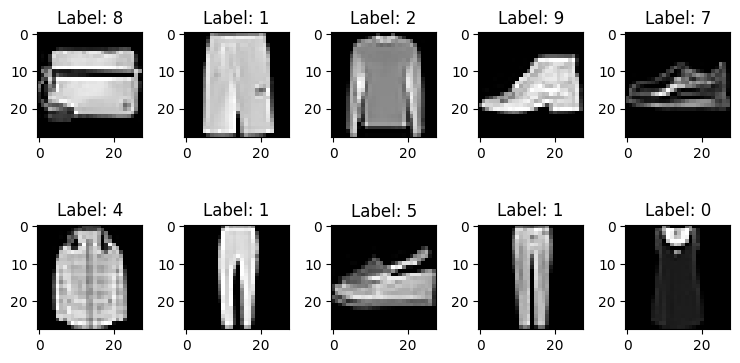

In [ ]:
def plot_samples():
  a, _, _ = get_fashion_mnist_dataloaders()
  num_row = 2
  num_col = 5# plot images
  num_images = num_row * num_col
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
  for i, (x,y) in enumerate(a):
      if i >= num_images:
        break
      ax = axes[i//num_col, i%num_col]
      x = (x.numpy().squeeze() * 255).astype(int)
      y = y.numpy()[0]
      ax.imshow(x, cmap='gray')
      ax.set_title(f"Label: {y}")

  plt.tight_layout()
  plt.show()
plot_samples()

## Fonctions à compléter

In [ ]:
def accuracy(y, y_pred) :
    # todo : nombre d'éléments à classifier.
    card_D = torch.tensor(y.size(0), dtype=torch.float32)

    # todo : calcul du nombre d'éléments bien classifiés.

    # Find labels based on highest probability
    true_labels = torch.argmax(y, dim=1) # e.g [0, 1, 0] -> 1
    predicted_labels = torch.argmax(y_pred, dim=1) # e.g [0.1, 0.8, 0.1] -> 1
    # Compute number of right prediction
    card_C = torch.sum(true_labels == predicted_labels).float()

    # todo : calcul de la précision de classification.
    acc = card_C / card_D

    return acc, (card_C, card_D)

def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)

        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)

        _, (n_acc, n_samples) = accuracy(y, y_pred)

        cardinal = cardinal + n_samples
        loss     = loss + xentrp
        n_accurate_preds  = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss

def cross_entropy(y, y_pred):
    # Cross Entropy Loss

    # Avoid Nan Problems
    epsilon = 1e-12
    y_pred_clipped = torch.clamp(y_pred, min=epsilon, max=1.0)
    loss = -torch.sum(y * torch.log(y_pred_clipped))
    return loss

def softmax(x, axis=-1):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(torch.tensor([[1000, 10000, 100000]]))

    # Modifying X for stability
    x_max = torch.max(x, dim=axis, keepdim=True).values
    x_stable = x - x_max

    # Softmax Function
    exp_x = torch.exp(x_stable) # Term to term exponential for x (batch_size, num_classes)
    sum_exp_x = torch.sum(exp_x, dim=axis, keepdim=True) # Scalar sum along each row (batch_size, 1)
    values = exp_x / sum_exp_x # Softmax result (batch_size, num_classes)

    return values

def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    ones = torch.ones(x.size(0), 1) # create ones column
    x_tilde = torch.cat((x, ones), dim=axis)  # augments x along the axis (last)
    return x_tilde

In [ ]:
class LinearModel:
    def __init__(self, num_features, num_classes):
      self.params = torch.normal(0, 0.01, (num_features + 1, num_classes))

      self.t = 0
      self.m_t = 0 # pour Adam: moyennes mobiles du gradient
      self.v_t = 0 # pour Adam: moyennes mobiles du carré du gradient

    def forward(self, x):
      # todo : implémenter calcul des outputs en fonction des inputs `x`.
      # Add a column for bias
      inputs = inputs_tilde(x) # (batch_size, num_features + 1)

      # Compute logits = W*x+b
      logits = torch.matmul(inputs, self.params) # (batch_size, num_classes)

      # Apply softmax
      outputs = softmax(logits, axis=-1) # (batch_size, num_classes)

      return outputs

    def get_grads(self, y, y_pred, X):
      # todo : implémenter calcul des gradients.

      X = inputs_tilde(X)

      # Compute difference between prediction and real labels
      diff = y_pred - y  # (batch_size, num_classes)

      # Compute gradients
      grads = torch.matmul(X.T, diff) / X.size(0)  # Divide by batch_size to normalize the values (num_features + 1, num_classes)

      return grads

    def sgd_update(self, lr, grads):
      # TODO : implémenter mise à jour des paramètres ici.
      self.params -= lr * grads

    def adam_update(self, lr, grads):
      # TODO : implémenter mise à jour des paramètres ici.

      beta1 = 0.9
      beta2 = 0.999
      epsilon = 1e-8

      # Update m_t
      self.m_t = beta1 * self.m_t + (1 - beta1) * grads

      # Update v_t
      self.v_t = beta2 * self.v_t + (1 - beta2) * (grads ** 2)

      # Bias Correction
      m_t_hat = self.m_t / (1 - beta1 ** (self.t + 1))
      v_t_hat = self.v_t / (1 - beta2 ** (self.t + 1))

      # Update parameters
      self.params -= lr * m_t_hat / (torch.sqrt(v_t_hat) + epsilon)

      # Increment counter
      self.t += 1

def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):
        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
          for x, y in data_loader_train:
              x, y = reshape_input(x, y)
              y_pred = model.forward(x)
              loss = cross_entropy(y, y_pred)
              grads = model.get_grads(y, y_pred, x)
              if sgd:
                model.sgd_update(lr, grads)
              else:
                model.adam_update(lr, grads)

        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        if accuracy_val > best_val_accuracy:
          # record the best model parameters and best validation accuracy
          best_val_accuracy = accuracy_val
          best_model = model

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        print(f"Epoch {epoch:2d}, \
                Train: loss={loss_train.item():.3f}, accuracy={accuracy_train.item()*100:.1f}%, \
                Valid: loss={loss_val.item():.3f}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger


## Évaluation

### SGD: Recherche d'hyperparamètres

In [ ]:
# SGD
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [1000]   # Define ranges in a list
lr_list = [0.001]           # Define ranges in a list

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      model = LinearModel(num_features=784, num_classes=10)

      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.001 and a batch size of 1000
Epoch  0,                 Train: loss=2.343, accuracy=7.8%,                 Valid: loss=2.343, accuracy=8.4%
Epoch  1,                 Train: loss=2.209, accuracy=27.2%,                 Valid: loss=2.207, accuracy=27.5%
Epoch  2,                 Train: loss=2.105, accuracy=41.6%,                 Valid: loss=2.101, accuracy=41.7%
Epoch  3,                 Train: loss=2.015, accuracy=52.7%,                 Valid: loss=2.009, accuracy=53.1%
Epoch  4,                 Train: loss=1.935, accuracy=60.4%,                 Valid: loss=1.927, accuracy=60.1%
Epoch  5,                 Train: loss=1.862, accuracy=63.7%,                 Valid: loss=1.854, accuracy=63.5%
validation accuracy = 63.517


#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 1 | 20 | 200 | 1000
-------------------|------------------|------------------|------------------|------------------|
**0.1**   | 82.900  | 84.433 | 84.583 | 80.617 | - |
**0.01** | 85.517  | 83.633 | 78.717 | 69.100 | - |
**0.001**  | 85.100  | 80.417 | 67.667 | 63.050 | - |

### SGD: Analyse du meilleur modèle

Epoch  0,                 Train: loss=2.334, accuracy=1.4%,                 Valid: loss=2.332, accuracy=1.7%
Epoch  1,                 Train: loss=0.687, accuracy=76.9%,                 Valid: loss=0.711, accuracy=76.1%
Epoch  2,                 Train: loss=0.466, accuracy=84.4%,                 Valid: loss=0.498, accuracy=83.9%
Epoch  3,                 Train: loss=0.517, accuracy=83.2%,                 Valid: loss=0.554, accuracy=82.3%
Epoch  4,                 Train: loss=0.476, accuracy=85.4%,                 Valid: loss=0.527, accuracy=84.5%
Epoch  5,                 Train: loss=0.484, accuracy=83.2%,                 Valid: loss=0.516, accuracy=82.4%
Best validation accuracy = 84.517
Evaluation of the best training model over test set
------
Loss : 0.563
Accuracy : 80.470


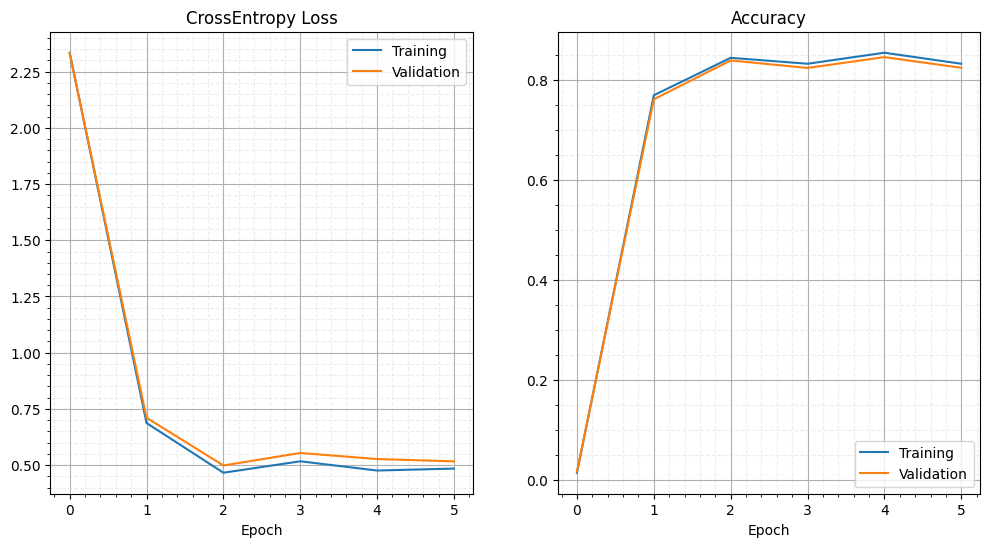

In [ ]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 1 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.01       # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=5, sgd=True,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [ ]:
# ADAM
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [1000]   # Define ranges in a list
lr_list = [0.001]          # Define ranges in a list

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=5, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.001 and a batch size of 1000
Epoch  0,                 Train: loss=2.298, accuracy=13.4%,                 Valid: loss=2.299, accuracy=13.7%
Epoch  1,                 Train: loss=0.844, accuracy=72.7%,                 Valid: loss=0.852, accuracy=72.1%
Epoch  2,                 Train: loss=0.694, accuracy=77.9%,                 Valid: loss=0.705, accuracy=77.2%
Epoch  3,                 Train: loss=0.625, accuracy=80.3%,                 Valid: loss=0.638, accuracy=79.7%
Epoch  4,                 Train: loss=0.582, accuracy=81.3%,                 Valid: loss=0.600, accuracy=80.6%
Epoch  5,                 Train: loss=0.554, accuracy=82.0%,                 Valid: loss=0.574, accuracy=81.5%
validation accuracy = 81.467


#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 1 | 20 | 200 | 1000
-------------------|------------------|------------------|------------------|------------------|
**0.1**   | 83.833  | 82.517 | 81.050 | 83.967 | - |
**0.01** | 82.717  | 84.017 | 84.783 | 85.383 | - |
**0.001**  | 84.983  | 84.817 | 84.800 | 82.033 | - |

### Adam: Analyse du meilleur modèle

Epoch  0,                 Train: loss=2.303, accuracy=14.0%,                 Valid: loss=2.303, accuracy=14.5%
Epoch  1,                 Train: loss=0.526, accuracy=82.6%,                 Valid: loss=0.540, accuracy=82.5%
Epoch  2,                 Train: loss=0.469, accuracy=84.2%,                 Valid: loss=0.483, accuracy=84.2%
Epoch  3,                 Train: loss=0.444, accuracy=85.1%,                 Valid: loss=0.466, accuracy=84.6%
Epoch  4,                 Train: loss=0.427, accuracy=85.4%,                 Valid: loss=0.448, accuracy=85.2%
Epoch  5,                 Train: loss=0.413, accuracy=86.0%,                 Valid: loss=0.437, accuracy=85.0%
Best validation accuracy = 85.167
Evaluation of the best training model over test set
------
Loss : 0.461
Accuracy : 83.970


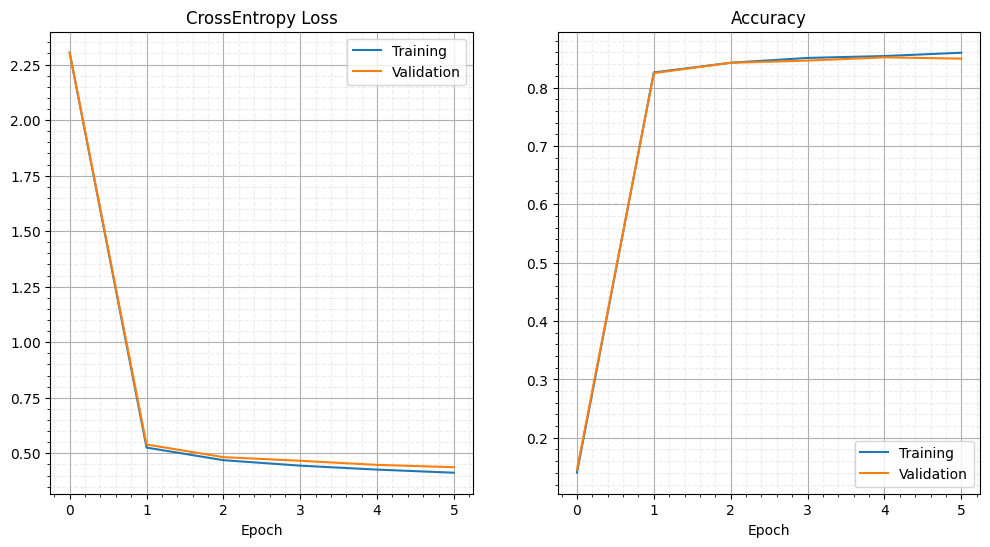

In [ ]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 1000 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.01         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=5, sgd=False,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Analyse des Résultats

L'implémentation du modèle donne une précision correcte pour les prédictions du jeu de données FashionMnist (>80%)

On observe une différence significative entre SGD et ADAM.
Adam semble être meilleur :
-Il donne de meilleurs résultats en terme de précision (sur le meilleur modèle : 83,87% vs 80,470%)
-La courbe obtenue est beaucoup plus lisse : on met en évidence que les moments utilisés par Adam réduisent les oscillations en minimisant les grands sauts lors de la descente (adaptativité)


# Partie 3 (20 points)

Pour cette partie, vous pouvez travailler en groupes de 2, mais il faut écrire sa propre dérivation et soumettre son propre rapport. Si vous travaillez avec un partenaire, il faut indiquer leur nom dans votre rapport.

### Problème

![picture](https://drive.google.com/uc?id=17_N7pIrf5pypQKiUh5cM7SX6raZUBcJC)

Considérons maintenant un réseau de neurones avec une couche d'entrée avec $D=784$ unités, $L$ couches cachées, chacune avec 300 unités et un vecteur de sortie $\mathbf{y}$ de dimension $K$. Vous avez $i = 1, .., N$ exemples dans un ensemble d'apprentissage, où chaque ${\bf x}_i \in \mathbb{R}^{784}$ est un vecteur de caractéristiques (features). $\mathbf{y}$ est un vecteur du type *one-hot* -- un vecteur de zéros avec un seul 1 pour indiquer que la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. La fonction de perte est donnée par
\begin{equation}
\mathscr{L} = -\sum_{i=1}^{N}\sum_{k=1}^{K}y_{k,i}\log (f_k( {\bf x}_i )  )
\end{equation}

La fonction d'activation de la couche finale a la forme  ${\bf f} = [f_1, ..., f_K]$ donné par la fonction d'activation softmax:
\begin{equation}
f_k( {\bf a}^{(L+1)}({\bf x}_i) ) = \frac{\exp(a_k^{(L+1)})}{\sum_{c=1}^{K}\exp(a_c^{(L+1)})}, \;\;\;\;
\nonumber
\end{equation}

et les couches cachées utilisent une fonction d'activation de type ReLU:
\begin{equation}
  {\bf h}^{(l)}({\bf a}^{(l)}({\bf x}_i)) = \text{ReLU}({\bf a}^{(l)}({\bf x}_i) = \max\Big(0, \, \, {\bf a}^{(l)}({\bf x}_i)\Big)
\end{equation}

où ${\bf a}^{(l)}$ est le vecteur résultant du calcul de la préactivation habituelle ${\bf a}^{(l)}={\bf W}^{(l)}{\bf h}^{(l-1)} + {\bf b}^{(l)}$, qui pourrait être simplifiée à ${\boldsymbol \theta}^{(l)}\tilde{\bf h}^{(l-1)}$ en utilisant l'astuce de définir $\tilde{\bf h}$ comme ${\bf h}$ avec un 1 concaténé à la fin du vecteur.



### Questions

* a) (10 points) Donnez le pseudocode incluant des *calculs matriciels—vectoriels* détaillés pour l'algorithme de rétropropagation pour calculer le gradient pour les paramètres de chaque couche **étant donné un exemple d'entraînement**.

* b) (15 points)
Implémentez l'optimisation basée sur le gradient de ce réseau en Pytorch.
Utilisez le code squelette ci-dessous comme point de départ et implémentez les mathématiques de l'algorithme de rétropropagation que vous avez décrit à la question précédente. Comparez vos gradients et votre optimisation avec le même modèle optimisé avec Autograd. Lequel est le plus rapide ? Proposez quelques expériences. Utilisez encore l'ensemble de données de Fashion MNIST (voir Partie 2). **Comparez différents modèles ayant différentes largeurs (nombre d'unités) et profondeurs (nombre de couches)**. Ici encore, n'utilisez l'ensemble de test que pour votre expérience finale lorsque vous pensez avoir obtenu votre meilleur modèle.


**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc. **Une fois que vous avez implémenté votre modèle, vous devez le comparer avec un modèle construit en utilisant les capacités de pytorch qui permettent une différenciation automatique. Autrement dit, pour la deuxième implémentation, vous pouvez utilisertorch.nn, torch.autograd ou à la méthode .backward().** Vous pouvez utiliser l’implémentation de votre choix pour explorer différentes architectures de modèles.

## Votre pseudocode:

# Algorithme de rétropopagation dans un réseau de neurones pour un exemple $\tilde{x}_i$:

Nous allons décrire l’algorithme de rétropropagation utilisé pour entraîner un réseau de neurones multi-couches (MLP).  

Le modèle est composé de :
- Une couche d’entrée de dimension , correspondant aux caractéristiques de l’entrée $x$.
- $L-1$ couches cachées appliquant une transformation linéaire suivie d’une fonction d’activation (ReLU).
- Une couche de sortie appliquant une transformation linéaire suivie de la fonction softmax.

Nous allons utiliser les notations suivantes :
- $W^{(l)}$ : matrice des poids de la couche $l$, incluant le biais.
- $h^{(l)}$ : vecteur d’activation de la couche $l$.
- $a^{(l)}$ : vecteur de pré-activation de la couche $l$
- $\delta^{(l)}$ : erreur de la couche $l$ utilisée pour la rétropropagation.
- $y_{\text{pred}}$ : sortie finale du modèle.

---

## Propagation avant

### Initialisation
L’entrée du réseau est un vecteur $x$ de dimension $D$, représentant les caractéristiques d’un exemple d’entraînement.

Nous définissons $h^{(0)}$ comme étant cette entrée :

$$
h^{(0)} = x \in \mathbb{R}^{D}
$$

Cette notation nous permet d’unifier les calculs pour toutes les couches du réseau.  
Ainsi, à chaque couche $l$, nous pourrons calculer la transformation suivante en utilisant $h^{(l)}$, en évitant d’introduire un cas particulier pour la couche d’entrée.

### Propagation à travers les couches cachées et la couche de sortie
Nous allons propager l’information à travers les $L$ couches du réseau en appliquant des transformations linéaires suivies d’activations.

Pour chaque couche $l$ allant de $1$ à $L$ :

$$
a^{(l)} = W^{(l)} h^{(l-1)}
$$

où :

- $W^{(l)}$ est la matrice des poids de la couche $l$, incluant le biais.
- $h^{(l-1)}$ est le vecteur d’activation de la couche précédente.


Ensuite, nous appliquons la fonction d’activation :
- Pour les couches cachées $l < L$, nous utilisons ReLU :

$$
h^{(l)} = \max(0, a^{(l)})
$$

- Pour la couche de sortie $l = L$, nous utilisons la fonction softmax pour obtenir des probabilités :

$$
h^{(L)} = \frac{\exp(a^{(L)})}{\sum_{k=1}^{K} \exp(a_k^{(L)})}
$$

La sortie finale du modèle est donc :

$$
y_{\text{pred}} = h^{(L)}
$$

---

## Calcul de l’erreur (Perte d’Entropie Croisée)

La perte que nous allons minimiser est l’entropie croisée :

$$
\mathcal{L} = - \sum_{k=1}^{K} y_k \log (y_{\text{pred},k})
$$

---

## Rétropropagation

Nous allons maintenant propager l’erreur en sens inverse pour calculer les gradients des paramètres.

### Erreur de la dernière couche :
En dérivant la fonction de perte $\mathcal{L}$ par rapport à $a^{(L)}$, on obtient :

$$
\delta^{(L)} = \frac{\partial \mathcal{L}}{\partial a^{(L)}} = h^{(L)} - y
$$

### Calcul du gradient des paramètres de la dernière couche :
$$
\nabla W^{(L)} = \delta^{(L)} (h^{(L-1)})^T
$$

### Propagation de l’erreur dans les couches cachées :
Nous allons propager cette erreur en utilisant la règle de la chaîne. Pour chaque couche cachée $l$ allant de $L-1$ à $1$ :

$$
\delta^{(l)} = (W^{(l+1)})^T \delta^{(l+1)} \odot \mathbb{1}(a^{(l)} > 0)
$$

où :
- $\mathbb{1}(a^{(l)} > 0)$ est la dérivée de la fonction ReLU, qui est 1 lorsque  $a^{(l)} > 0$, et 0 sinon.
- Le produit $\odot$ représente une multiplication terme à terme.

### Calcul des gradients des couches cachées :
$$
\nabla W^{(l)} = \delta^{(l)} (h^{(l-1)})^T
$$

---

## Descente de Gradient

Nous pouvons finalement mettre à jour les paramètres du modèle en utilisant la descente de gradient avec un taux d’apprentissage $\eta$ :

$$
W^{(l)} = W^{(l)} - \eta \nabla W^{(l)}
$$

---


## Fonctions à compléter

In [ ]:
''' Les fonctions dans cette cellule peuvent avoir les mêmes déclarations que celles de la partie 2'''
def accuracy(y, y_pred) :
    # todo : nombre d'éléments à classifier.
    card_D = torch.tensor(y.size(0), dtype=torch.float32)

    # todo : calcul du nombre d'éléments bien classifiés.

    # Find labels based on highest probability
    true_labels = torch.argmax(y, dim=1) # e.g [0, 1, 0] -> 1
    predicted_labels = torch.argmax(y_pred, dim=1) # e.g [0.1, 0.8, 0.1] -> 1
    # Compute number of right prediction
    card_C = torch.sum(true_labels == predicted_labels).float()

    # todo : calcul de la précision de classification.
    acc = card_C / card_D

    return acc, (card_C, card_D)

def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)

        cardinal = cardinal + n_samples
        loss     = loss + xentrp
        n_accurate_preds  = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss

def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    ones = torch.ones(x.size(0), 1) # create ones column
    x_tilde = torch.cat((x, ones), dim=axis)   # augments x along the axis (last)
    return x_tilde

def softmax(x, axis=-1):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(torch.tensor([[1000, 10000, 100000]]))

    # Modifying X for stability
    x_max = torch.max(x, dim=axis, keepdim=True).values
    x_stable = x - x_max

    # Softmax Function
    exp_x = torch.exp(x_stable) # Term to term exponential for x (batch_size, num_classes)
    sum_exp_x = torch.sum(exp_x, dim=axis, keepdim=True) # Scalar sum along each row (batch_size, 1)
    values = exp_x / sum_exp_x # Softmax result (batch_size, num_classes)

    return values

def cross_entropy(y, y_pred):
    # Cross Entropy Loss

    # Avoid Nan Problems
    epsilon = 1e-12
    y_pred_clipped = torch.clamp(y_pred, min=epsilon, max=1.0)
    loss = -torch.sum(y * torch.log(y_pred_clipped))
    return loss


def softmax_cross_entropy_backward(y, y_pred):
     # todo : calcul de la valeur du gradient de l'entropie croisée composée avec `softmax`
     values = y_pred - y
     return values

def relu_forward(x):
    # todo : calcul des valeurs de relu(x)
    values = torch.max(torch.zeros_like(x), x)
    return values

def relu_backward(x):
    # todo : calcul des valeurs du gradient de la fonction `relu`
    values = (x > 0).float()
    return values

# Fonction utilitaire pour initialiser les poids avec la "Xavier initialization" (une distribution normale ne permet pas de converger)
import numpy as np
def xavier_init(fan_in, fan_out):
    bound = np.sqrt(6.0 / (fan_in + fan_out))
    return torch.empty(fan_in, fan_out).uniform_(-bound, bound)



# Model est une classe representant votre reseaux de neuronnes
class MLPModel:
    def __init__(self, n_features, n_hidden_features, n_hidden_layers, n_classes):
        self.n_features        = n_features
        self.n_hidden_features = n_hidden_features
        self.n_hidden_layers   = n_hidden_layers
        self.n_classes         = n_classes

        # todo : initialiser la liste des paramètres Teta de l'estimateur.
        self.params = []

        # Matrice de poids de la couche d'entrée
        W0 = xavier_init(n_features + 1, n_hidden_features)
        self.params.append(W0)

        # Matrices de poids des couches cachées
        for _ in range(1, n_hidden_layers):
            WI = xavier_init(n_hidden_features + 1, n_hidden_features)
            self.params.append(WI)

        # Matrice de poids de la couche de sortie
        WL = xavier_init(n_hidden_features + 1, n_classes)
        self.params.append(WL)

        # print(f"Teta params={[p.shape for p in self.params]}")

        self.a = [] # liste contenant le resultat des multiplications matricielles
        self.h = [] # liste contenant le resultat des fonctions d'activations

        self.m_t = [torch.zeros_like(param) for param in self.params]  # pour Adam: moyennes mobiles du gradient
        self.v_t = [torch.zeros_like(param) for param in self.params]  # pour Adam: moyennes mobiles du carré du gradient
        self.t = 0

    def forward(self, x):
        self.a = []  # Réinitialise les pré-activations
        self.h = []  # Réinitialise les activations

        h = inputs_tilde(x)
        self.h.append(h)

        # Stockage des activations pour chaque matrice de poids dans les couches cachées
        for W in self.params[:-1]:
            a = torch.matmul(h, W)  # a = Wih+b = hWi
            self.a.append(a)

            h = relu_forward(a)     # ReLU
            h = inputs_tilde(h)     # ajout du biais pour appliquer la simplification
            self.h.append(h)

        # Stockage des activations pour la matrice de poids de la dernière couche
        a = torch.matmul(h, self.params[-1]) # a = WLh+b = hWL
        self.a.append(a)

        outputs = softmax(a)  # Softmax
        return outputs  # Retourne les probabilités pour chaque classe (batch_size, n_classes)


    def backward(self, y, y_pred):
        # todo : implémenter calcul des gradients.

        # Calcul des gradients
        grads = [None] * len(self.params)  # Liste pour stocker les gradients (pour chaque matrice de poids et biais)

        # Erreur de la couche de sortie
        delta = softmax_cross_entropy_backward(y, y_pred)  # delta^(L) = h^(L) - y


        # Gradient pour la couche de sortie
        grads[-1] = torch.matmul(self.h[-1].T, delta)  # grads^(L-1) = h^(L-1).T * delta^(L)

        # Backpropagation pour les couches cachées

        for i in range(len(self.params) - 2, -1, -1):  # Part de l'avant-dernière couche et remonte vers la première couche

            # Erreur de la couche courante
            delta = torch.matmul(delta, self.params[i + 1][:-1, :].T)  # delta^(l) = delta^(l+1) * W^(l+1).T
            delta *= relu_backward(self.a[i])  # delta^(l) *= ReLU'(a^(l))

            # Gradient de la couche courante
            grads[i] = torch.matmul(self.h[i].T, delta)  # grads^(l) = h^(l-1).T * delta^(l)

        return grads



    def sgd_update(self, lr, grads):
        for i in range(len(self.params)):
            self.params[i] -= lr * grads[i]  # Mise à jour des poids W^(l)

    def adam_update(self, lr, grads):
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8
        self.t += 1

        for i in range(len(self.params)):
            # Mise à jour des moyennes mobiles des gradients
            self.m_t[i] = beta1 * self.m_t[i] + (1 - beta1) * grads[i]
            self.v_t[i] = beta2 * self.v_t[i] + (1 - beta2) * (grads[i] ** 2)

            # Correction du biais
            m_t_hat = self.m_t[i] / (1 - beta1 ** self.t)
            v_t_hat = self.v_t[i] / (1 - beta2 ** self.t)
            # Mise à jour des poids
            self.params[i] -= lr * m_t_hat / (torch.sqrt(v_t_hat) + epsilon)


def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):

        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
            for x, y in data_loader_train:
                x, y = reshape_input(x, y)

                y_pred = model.forward(x)
                grads  = model.backward(y, y_pred)
                if sgd:
                  model.sgd_update(lr, grads)
                else:
                  model.adam_update(lr, grads)

        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        if accuracy_val > best_val_accuracy:
            best_val_accuracy = accuracy_val
            best_model = model

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        print(f"Epoch {epoch:2d}, \
                Train:loss={loss_train.item():.3f}, accuracy={accuracy_train.item()*100:.1f}%, \
                Valid: loss={loss_val.item():.3f}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger

## Évaluation

### SGD: Recherche d'hyperparamètres

In [ ]:
# SGD
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1,3,5]                  # Define ranges in a list
width_list = [25,100,300,500,1000]    # Define ranges in a list
lr = 0.001                            # Some value
batch_size = 20                       # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Epoch  0,                 Train:loss=2.521, accuracy=4.8%,                 Valid: loss=2.526, accuracy=4.4%
Epoch  1,                 Train:loss=0.515, accuracy=82.6%,                 Valid: loss=0.512, accuracy=82.7%
Epoch  2,                 Train:loss=0.435, accuracy=84.9%,                 Valid: loss=0.439, accuracy=84.8%
Epoch  3,                 Train:loss=0.408, accuracy=85.6%,                 Valid: loss=0.413, accuracy=85.6%
Epoch  4,                 Train:loss=0.409, accuracy=85.4%,                 Valid: loss=0.421, accuracy=84.6%
Epoch  5,                 Train:loss=0.383, accuracy=86.5%,                 Valid: loss=0.393, accuracy=86.1%
validation accuracy = 86.133
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 100 units
Epoch  0,                 Train:loss=2.590, accura

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25 | 100 | 300 | 500 | 1000
-------------------|------------------|------------------|------------------|------------------|------------------|
**1**   | 86.133  | 87.250 | 86.483 | 87.550 | 87.233 |
**3** | 84.450  | 87.500 | 88.467 | 87.733 | 88.850 |
**5**  | 85.850  | 87.617 | 88.133 | 88.450 | 87.283 |

### SGD: Analyse du meilleur modèle

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch  0,                 Train:loss=2.317, accuracy=5.4%,                 Valid: loss=2.317, accuracy=5.4%
Epoch  1,                 Train:loss=0.417, accuracy=85.2%,                 Valid: loss=0.427, accuracy=84.8%
Epoch  2,                 Train:loss=0.364, accuracy=86.4%,                 Valid: loss=0.380, accuracy=85.9%
Epoch  3,                 Train:loss=0.333, accuracy=87.6%,                 Valid: loss=0.353, accuracy=86.7%
Epoch  4,                 Train:loss=0.289, accuracy=89.4%,                 Valid: loss=0.321, accuracy=88.3%
Epoch  5,                 Train:loss=0.295, accuracy=88.9%,                 Valid: loss=0.333, accuracy=87.9%
Best validation accuracy = 88.333
Evaluation of the best training model over test set
------
Loss : 0.365
Accuracy : 86.270


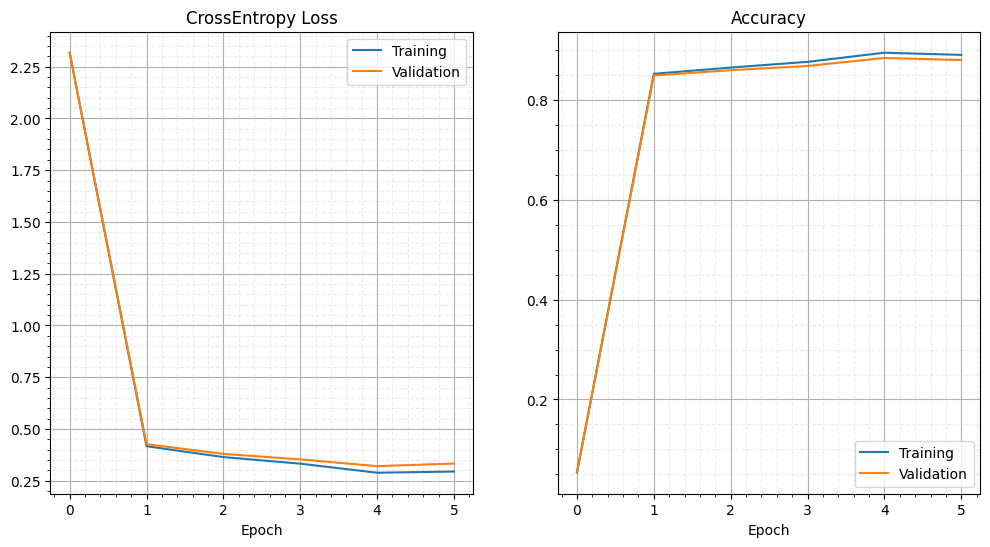

In [ ]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 3         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 1000      # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001        # Some value
batch_size = 20   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=5, sgd=True,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [ ]:
# ADAM
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1,3,5]                  # Define ranges in a list
width_list = [25,100,300,500,1000]    # Define ranges in a list
lr = 0.001                            # Some value
batch_size = 20                       # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model, lr=lr, nb_epochs=5, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Epoch  0,                 Train:loss=2.454, accuracy=10.1%,                 Valid: loss=2.452, accuracy=9.9%
Epoch  1,                 Train:loss=0.423, accuracy=85.4%,                 Valid: loss=0.436, accuracy=84.6%
Epoch  2,                 Train:loss=0.441, accuracy=84.0%,                 Valid: loss=0.463, accuracy=82.7%
Epoch  3,                 Train:loss=0.353, accuracy=87.6%,                 Valid: loss=0.386, accuracy=86.3%
Epoch  4,                 Train:loss=0.349, accuracy=87.3%,                 Valid: loss=0.384, accuracy=85.8%
Epoch  5,                 Train:loss=0.321, accuracy=88.4%,                 Valid: loss=0.355, accuracy=86.8%
validation accuracy = 86.817
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 100 units
Epoch  0,                 Train:loss=2.506, accur

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25 | 100 | 300 | 500 | 1000
-------------------|------------------|------------------|------------------|------------------|------------------|
**1**   | 86.817  | 87.483 | 89.367 | 87.483 | 88.267 |
**3** | 87.265  | 87.583 | 87.850 | 88.233 | 88.000 |
**5**  | 86.217  | 87.700 | 87.517 | 87.550 | 87.250 |

### Adam: Analyse du meilleur modèle

Epoch  0,                 Train:loss=2.355, accuracy=8.6%,                 Valid: loss=2.351, accuracy=9.3%
Epoch  1,                 Train:loss=0.387, accuracy=85.8%,                 Valid: loss=0.418, accuracy=84.8%
Epoch  2,                 Train:loss=0.331, accuracy=87.7%,                 Valid: loss=0.376, accuracy=86.7%
Epoch  3,                 Train:loss=0.317, accuracy=88.3%,                 Valid: loss=0.378, accuracy=86.8%
Epoch  4,                 Train:loss=0.317, accuracy=87.7%,                 Valid: loss=0.392, accuracy=85.8%
Epoch  5,                 Train:loss=0.302, accuracy=88.9%,                 Valid: loss=0.389, accuracy=86.5%
Best validation accuracy = 86.767
Evaluation of the best training model over test set
------
Loss : 0.401
Accuracy : 86.410


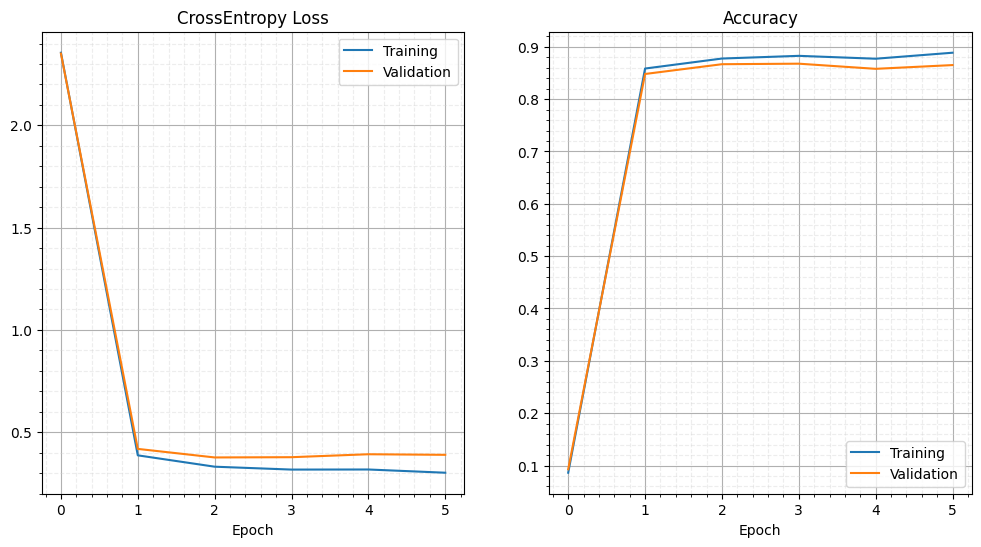

In [ ]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 1             # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 300           # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001            # Some value
batch_size = 20       # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=5, sgd=False,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Implémentation en utilisant les capacités de Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, num_hidden_layers=3, num_classes=10):
        super(MLP, self).__init__()

        layers = []

        # Couche d'entrée
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())

        # Couches cachées
        for _ in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())

        # Couche de sortie (Softmax directement dans Cross Entropy)
        layers.append(nn.Linear(hidden_size, num_classes))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)


In [ ]:
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    loss = total_loss / len(data_loader)
    accuracy = 100. * correct / total
    return accuracy, loss

In [ ]:
def train_model(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Cross Entropy
    criterion = nn.CrossEntropyLoss()
    # Optimizer
    optimizer = optim.SGD(model.parameters(), lr=lr) if sgd else optim.Adam(model.parameters(), lr=lr)

    best_model = None
    best_val_accuracy = 0

    for epoch in range(nb_epochs + 1):

        # Arbitrairement zero pour des raisons de simplicité pour l'epoch 0
        loss_train = 0.0
        accuracy_train = 0.0

        if epoch > 0:
            model.train()
            running_loss = 0.0
            correct = 0
            total = 0

            for inputs, labels in data_loader_train:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()  # Reset des gradients
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()  # Calcul automatique du gradient
                optimizer.step()  # Mise à jour des poids

                # Pour le calcul de l'accuracy
                running_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            # Évaluation sur l'ensemble d'entrainement
            accuracy_train = 100. * correct / total
            loss_train = running_loss / len(data_loader_train)

        # Évaluation sur l'ensemble de validation
        accuracy_val, loss_val = evaluate_model(model, data_loader_val, criterion, device)

        if accuracy_val > best_val_accuracy:
            best_val_accuracy = accuracy_val
            best_model = model

        print(f"Epoch {epoch:2d}, "
              f"Train: loss={loss_train:.3f}, accuracy={accuracy_train:.1f}%, "
              f"Valid: loss={loss_val:.3f}, accuracy={accuracy_val:.1f}%")

    return best_model, best_val_accuracy

### Test sans Adam avec les paramètres optimaux trouvés

In [ ]:
depth_list = [3]
width_list = [1000]
lr = 0.001
batch_size = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for depth in depth_list:
    for width in width_list:
        print("------------------------------------------------------------------")
        print(f"Training model with {depth} hidden layers and {width} neurons per layer")

        train_loader, val_loader, test_loader = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
        model = MLP(input_size=784, hidden_size=width, num_hidden_layers=depth, num_classes=10).to(device)

        best_model, best_val_accuracy = train_model(model, lr=lr, nb_epochs=5, sgd=True, data_loader_train=train_loader, data_loader_val=val_loader)
        test_acc, test_loss = evaluate_model(best_model, test_loader, nn.CrossEntropyLoss(), device) # On calcule l'accuracy sur le jeu de test avec notre meilleur modèle

        print(f"Validation accuracy = {best_val_accuracy:.3f}")
        print(f"Test Accuracy = {test_acc:.2f}% | Test Loss = {test_loss:.4f}")


------------------------------------------------------------------
Training model with 3 hidden layers and 1000 neurons per layer


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch  0, Train: loss=0.000, accuracy=0.0%, Valid: loss=2.303, accuracy=14.3%
Epoch  1, Train: loss=2.197, accuracy=30.5%, Valid: loss=1.999, accuracy=45.4%
Epoch  2, Train: loss=1.559, accuracy=55.2%, Valid: loss=1.197, accuracy=61.1%
Epoch  3, Train: loss=1.024, accuracy=64.3%, Valid: loss=0.900, accuracy=67.0%
Epoch  4, Train: loss=0.829, accuracy=69.4%, Valid: loss=0.781, accuracy=71.1%
Epoch  5, Train: loss=0.739, accuracy=72.7%, Valid: loss=0.713, accuracy=74.7%
Validation accuracy = 74.733
Test Accuracy = 73.59% | Test Loss = 0.7243


### Test sans Adam en augmentant le learning rate

In [ ]:
depth_list = [3]
width_list = [1000]
lr = 0.01
batch_size = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for depth in depth_list:
    for width in width_list:
        print("------------------------------------------------------------------")
        print(f"Training model with {depth} hidden layers and {width} neurons per layer")

        train_loader, val_loader, test_loader = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
        model = MLP(input_size=784, hidden_size=width, num_hidden_layers=depth, num_classes=10).to(device)

        best_model, best_val_accuracy = train_model(model, lr=lr, nb_epochs=5, sgd=True, data_loader_train=train_loader, data_loader_val=val_loader)
        test_acc, test_loss = evaluate_model(best_model, test_loader, nn.CrossEntropyLoss(), device) # On calcule l'accuracy sur le jeu de test avec notre meilleur modèle

        print(f"Validation accuracy = {best_val_accuracy:.3f}")
        print(f"Test Accuracy = {test_acc:.2f}% | Test Loss = {test_loss:.4f}")


------------------------------------------------------------------
Training model with 3 hidden layers and 1000 neurons per layer
Epoch  0, Train: loss=0.000, accuracy=0.0%, Valid: loss=2.302, accuracy=11.8%
Epoch  1, Train: loss=0.993, accuracy=66.3%, Valid: loss=0.586, accuracy=79.4%
Epoch  2, Train: loss=0.526, accuracy=81.5%, Valid: loss=0.473, accuracy=83.8%
Epoch  3, Train: loss=0.454, accuracy=83.9%, Valid: loss=0.426, accuracy=84.9%
Epoch  4, Train: loss=0.414, accuracy=85.2%, Valid: loss=0.436, accuracy=84.7%
Epoch  5, Train: loss=0.387, accuracy=86.3%, Valid: loss=0.391, accuracy=85.7%
Validation accuracy = 85.650
Test Accuracy = 84.92% | Test Loss = 0.4139


### Test avec Adam avec les paramètres optimaux trouvés

In [ ]:
depth_list = [1]
width_list = [300]
lr = 0.001
batch_size = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for depth in depth_list:
    for width in width_list:
        print("------------------------------------------------------------------")
        print(f"Training model with {depth} hidden layers and {width} neurons per layer")

        train_loader, val_loader, test_loader = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
        model = MLP(input_size=784, hidden_size=width, num_hidden_layers=depth, num_classes=10).to(device)

        best_model, best_val_accuracy = train_model(model, lr=lr, nb_epochs=5, sgd=False, data_loader_train=train_loader, data_loader_val=val_loader)
        test_acc, test_loss = evaluate_model(best_model, test_loader, nn.CrossEntropyLoss(), device) # On calcule l'accuracy sur le jeu de test avec notre meilleur modèle

        print(f"Validation accuracy = {best_val_accuracy:.3f}")
        print(f"Test Accuracy = {test_acc:.2f}% | Test Loss = {test_loss:.4f}")

------------------------------------------------------------------
Training model with 1 hidden layers and 300 neurons per layer
Epoch  0, Train: loss=0.000, accuracy=0.0%, Valid: loss=2.298, accuracy=12.9%
Epoch  1, Train: loss=0.494, accuracy=82.3%, Valid: loss=0.359, accuracy=87.0%
Epoch  2, Train: loss=0.370, accuracy=86.5%, Valid: loss=0.332, accuracy=87.9%
Epoch  3, Train: loss=0.329, accuracy=87.9%, Valid: loss=0.315, accuracy=88.8%
Epoch  4, Train: loss=0.306, accuracy=88.8%, Valid: loss=0.321, accuracy=88.3%
Epoch  5, Train: loss=0.286, accuracy=89.5%, Valid: loss=0.300, accuracy=89.1%
Validation accuracy = 89.100
Test Accuracy = 88.08% | Test Loss = 0.3441


## Analyse des résultats


On peut faire plusieurs remarques sur nos résultats :  

•L'implémentation du MLP en partie 3 offre une précision supérieure au modèle simple implémenté en partie 2, atteignant généralement plus 85% de précision en validation contre ~80-85% pour l'ancien modèle.  
On pourrait expliquer cela à la capacité du MLP à capturer des relations non linéaires grâce à ses couches cachées.

•L'implémentation qui utilise les capacités de Pytorch semble donner des performances relativements similaires, voir meilleures (obtention du meilleur score 89%).  
L'exécution est aussi plus rapide, probablement due à des mécanismes internes d'optimisation.  
Par ailleurs, nous avons remarqué que les paramètres optimaux n'était pas forcément similaires à ceux trouvés lors de l'implémentation du MLP "à la main" (que 75% de précision contre 88% en utilisant les paramètres optimaux sans Adam).   
Nous avons alors vu qu'augmenter le learning rate pouvait alors augmenter cette précision assez basse.  
On pourrait attribuer cela au fait que l'implémentation avec la différenciation automatique diverge probablement dans l'initialisation des poids, la gestion des biais, ou encore lors du calcul des gradients (ajout de régularization)...

•L'implémentation avec Adam parait fournir de meilleures performances et converger plus rapidement, comme dans la partie 2.